**Data Understanding and Preparation**

In [2]:
# Load The Csv File :
# Using Pandas Library :

import pandas as pd

# Upload From computer :
from google.colab import files
uploaded = files.upload()

Saving twitter_validation.csv to twitter_validation.csv


In [5]:
# Read The Csv File From uploaded :
df = pd.read_csv(next(iter(uploaded)))

In [6]:
# Quick Look At The Data :
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

**Data Cleaning**

In [9]:
# Remove Rows with missing sentiment Labels :
df = df.dropna(subset=['Irrelevant'])

# Standardize text (optional : Remove URLs, Handles) :
import re

def clean_text(text):
  text = re.sub(r"http\S+", "", text) # Remove URLs
  text = re.sub(r"@\S+", "", text) # Remove Handles (fixed to remove @ followed by non-whitespace)
  text = re.sub(r"#\S+", "", text) # Remove Hashtags (fixed to remove # followed by non-whitespace)
  # text = re.sub(r"\S+", "", text) # This line was incorrect and removed
  text = re.sub(r'\s+', ' ', text).strip() # Collapse multiple spaces to a single space and strip leading/trailing whitespace
  return text.lower() # Convert to lowercase

# Assuming the text column is the one with the long name.
# You might want to rename this column for easier access later.
text_column_name = df.columns[3] # Get the name of the fourth column
df['clean_text'] = df[text_column_name].astype(str).apply(clean_text)

# Display the first few rows with the new 'clean_text' column
print(df[['Irrelevant', text_column_name, 'clean_text']].head())

  Irrelevant  \
0    Neutral   
1   Negative   
2   Negative   
3    Neutral   
4   Negative   

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  \
0  BBC News - Amazon boss Jeff Bezos rejects clai...                                                                                                                                                                                                   
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                   
2  CSGO matchmaking is so full of closet hacking,...                                                                                                           

**Exploratory Data Analysis**

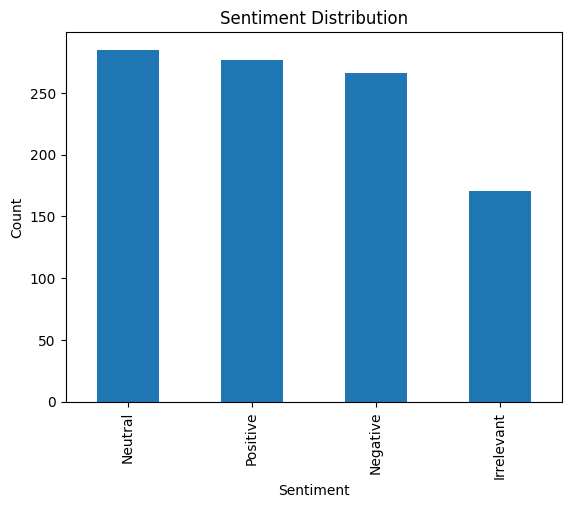

In [19]:
# Using Matplotlib libraries To Visualize The Trends :
import matplotlib.pyplot as plt

# sentiment Distribution :
sentiment_counts = df['Irrelevant'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


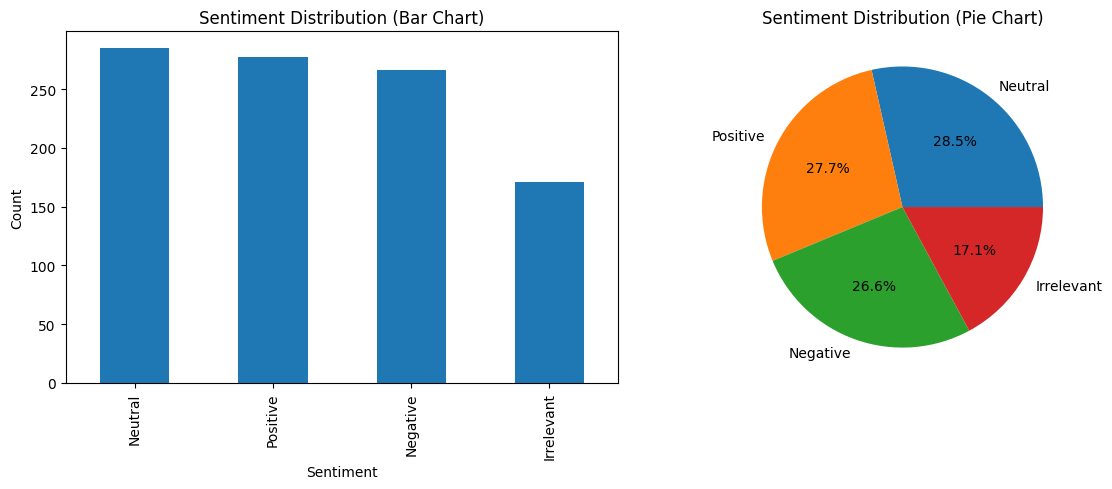

In [20]:
# Visualize Through Both pie and Bar chart :

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Bar chart on the first subplot
sentiment_counts.plot(kind='bar', ax=axes[0], title='Sentiment Distribution (Bar Chart)')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

# Pie chart on the second subplot
sentiment_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', title='Sentiment Distribution (Pie Chart)')
axes[1].set_ylabel('') # Remove default y-label for pie chart

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

**Brand Topic - Level Sentiment:**

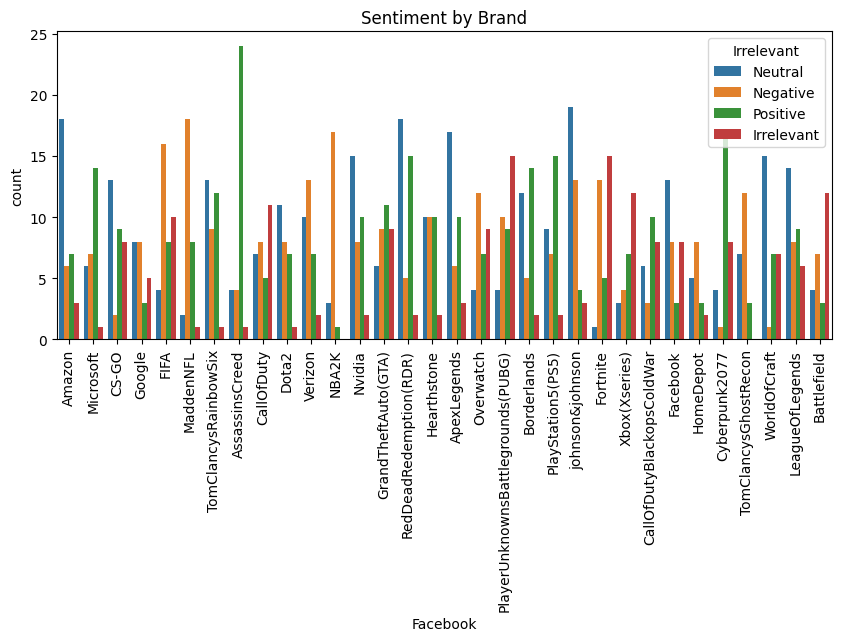

In [29]:
# using seaborn
import seaborn as sns

plt.figure(figsize=(10,4))
sns.countplot(data = df,x = 'Facebook',hue = 'Irrelevant')
plt.xticks(rotation = 90)
plt.title('Sentiment by Brand')
plt.show()

**Visualization and Pattern Discovery**

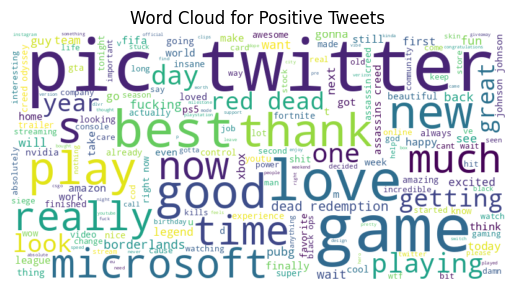

In [31]:
from wordcloud import WordCloud

# Example: Wordcloud of positive tweets
positive_texts = ' '.join(df[df['Irrelevant']=='Positive']['clean_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()
